In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_csv_name = "final_test.csv"
data = pd.read_csv("final_test.csv", names=["data_structure", "num_threads", "num_ops", "key_range", "pct_get", "pct_add", "pct_remove", "throughput", "mem_util"])
data.head()

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput,mem_util
0,sl,2,1000000,200000,0,50,50,737911.9448,31973760
1,sl,2,1000000,200000,0,50,50,762052.8295,31917120
2,sl,2,1000000,200000,0,50,50,726279.9740,31960960
3,sl,2,1000000,200000,0,50,50,748454.2461,31890240
4,sl,2,1000000,200000,0,50,50,754536.8255,31971520


In [3]:
gb = data.groupby([
    "data_structure",
    "num_threads",
    "num_ops",
    "key_range",
    "pct_get",
    "pct_add",
    "pct_remove"
]).agg({'throughput' : ['mean', 'min', 'max'], 'mem_util' : ['mean', 'min', 'max']})

In [4]:
gb.columns = ["throughput_mean", "throughput_min", "throughput_max", "mem_util_mean", "mem_util_min", "mem_util_max"]

In [5]:
gb = gb.reset_index()

In [44]:
gb

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput_mean,throughput_min,throughput_max,mem_util_mean,mem_util_min,mem_util_max
0,bst,2,1000000,200000,0,50,50,1.209116e+06,1.162532e+06,1.245661e+06,7197494.4,7175592,7213320
1,bst,2,1000000,200000,70,20,10,1.393906e+06,1.312860e+06,1.497943e+06,9120960.0,9117144,9126000
2,bst,2,1000000,200000,90,9,1,1.647209e+06,1.623162e+06,1.723218e+06,8175787.2,8163432,8200872
3,bst,2,1000000,2000000,0,50,50,7.053068e+05,6.475847e+05,7.724999e+05,45516643.2,45474120,45568656
4,bst,2,1000000,2000000,70,20,10,1.050499e+06,1.029491e+06,1.089558e+06,24913353.6,24899184,24924240
5,bst,2,1000000,2000000,90,9,1,1.482115e+06,1.433883e+06,1.511456e+06,12363609.6,12326616,12389760
6,bst,4,1000000,200000,0,50,50,3.734445e+05,3.656192e+05,3.785723e+05,7207819.2,7179768,7229160
7,bst,4,1000000,200000,70,20,10,3.725728e+05,3.627570e+05,3.816695e+05,9570585.6,9553536,9584640
8,bst,4,1000000,200000,90,9,1,3.884133e+05,3.818207e+05,3.952736e+05,11196316.8,11169864,11222856
9,bst,4,1000000,2000000,0,50,50,2.422813e+05,2.327123e+05,2.506928e+05,62245900.8,62172720,62340048


In [11]:
gb[(gb.data_structure == "bst") & (gb.pct_add == 50)]

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput_mean,throughput_min,throughput_max,mem_util_mean,mem_util_min,mem_util_max
0,bst,2,1000000,200000,0,50,50,1.209116e+06,1.162532e+06,1.245661e+06,7197494.4,7175592,7213320
3,bst,2,1000000,2000000,0,50,50,7.053068e+05,6.475847e+05,7.724999e+05,45516643.2,45474120,45568656
6,bst,4,1000000,200000,0,50,50,3.734445e+05,3.656192e+05,3.785723e+05,7207819.2,7179768,7229160
9,bst,4,1000000,2000000,0,50,50,2.422813e+05,2.327123e+05,2.506928e+05,62245900.8,62172720,62340048
12,bst,6,1000000,200000,0,50,50,1.675930e+05,1.665098e+05,1.686429e+05,7196587.2,7161984,7210512
15,bst,6,1000000,2000000,0,50,50,1.300260e+05,1.279049e+05,1.326973e+05,68430844.8,68387328,68481000
18,bst,8,1000000,200000,0,50,50,9.599804e+04,9.502565e+04,9.671119e+04,7209662.4,7179048,7233480
21,bst,8,1000000,2000000,0,50,50,7.634573e+04,7.554954e+04,7.805752e+04,70692235.2,70590672,70730136
24,bst,10,1000000,200000,0,50,50,5.958103e+04,5.764974e+04,6.165243e+04,7221081.6,7210584,7230312
27,bst,10,1000000,2000000,0,50,50,5.184875e+04,5.111746e+04,5.250137e+04,71488800.0,71441928,71567568


In [37]:
def plot_graph(title, x1, y1, x2, y2):
    plt.plot(x1, y1 / 1000, label="BST")
    plt.plot(x1, y2 / 1000, label="SL")
    plt.xlabel("Number of threads")
    plt.ylabel("Average operations (thousands) per second")
    plt.title(title)
    plt.legend()

In [18]:
bst_data_50_50_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 50) & (gb.key_range == 200000)]
sl_data_50_50_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 50) & (gb.key_range == 200000)]

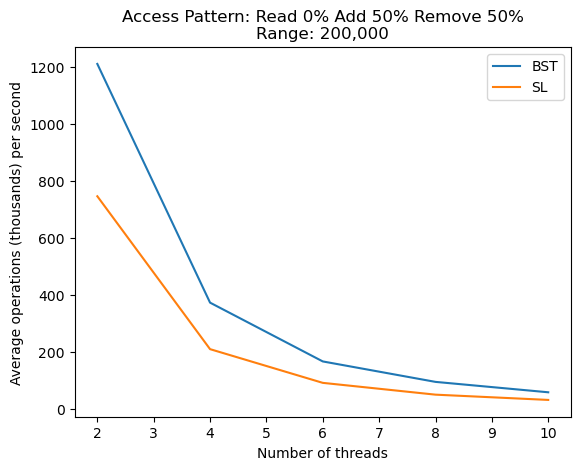

In [31]:
plt.plot(bst_data_50_50_200k.num_threads, bst_data_50_50_200k.throughput_mean / 1000, label="BST")
plt.plot(bst_data_50_50_200k.num_threads, sl_data_50_50_200k.throughput_mean / 1000, label="SL")
plt.xlabel("Number of threads")
plt.ylabel("Average operations (thousands) per second")
plt.title("Access Pattern: Read 0% Add 50% Remove 50%\nRange: 200,000")
plt.legend()

In [29]:
bst_data_50_50_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 50) & (gb.key_range == 2000000)]
sl_data_50_50_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 50) & (gb.key_range == 2000000)]

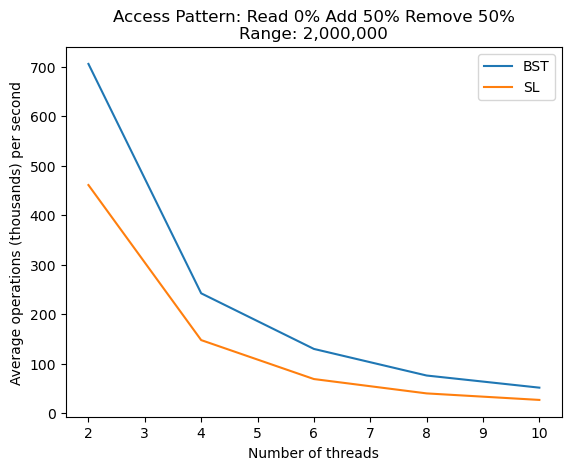

In [32]:
plt.plot(bst_data_50_50_2M.num_threads, bst_data_50_50_2M.throughput_mean / 1000, label="BST")
plt.plot(bst_data_50_50_2M.num_threads, sl_data_50_50_2M.throughput_mean / 1000, label="SL")
plt.xlabel("Number of threads")
plt.ylabel("Average operations (thousands) per second")
plt.title("Access Pattern: Read 0% Add 50% Remove 50%\nRange: 2,000,000")
plt.legend()

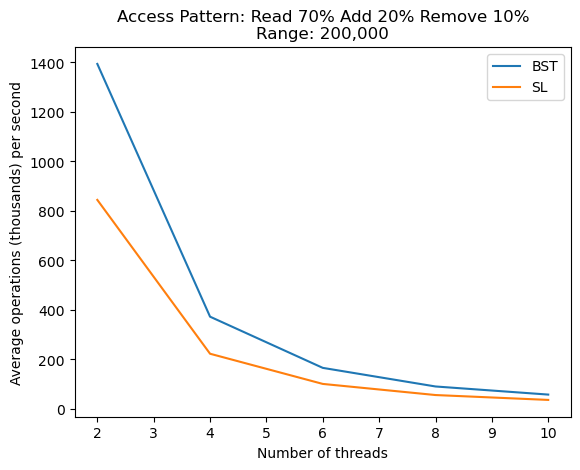

In [38]:
bst_data_70_20_10_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 20) & (gb.key_range == 200000)]
sl_data_70_20_10_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 20) & (gb.key_range == 200000)]
plot_graph(
    "Access Pattern: Read 70% Add 20% Remove 10%\nRange: 200,000",
    bst_data_70_20_10_200k.num_threads,
    bst_data_70_20_10_200k.throughput_mean,
    sl_data_70_20_10_200k.num_threads,
    sl_data_70_20_10_200k.throughput_mean
)

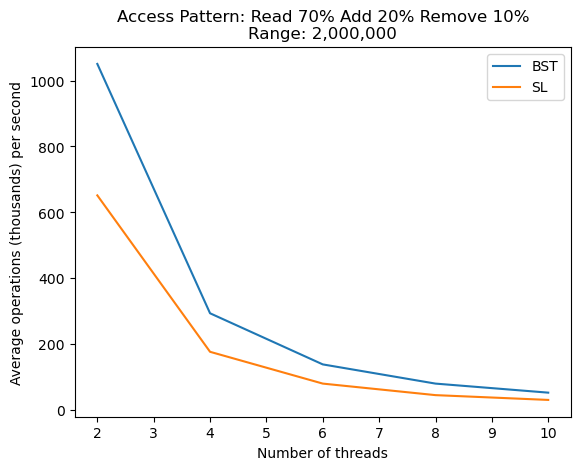

In [39]:
bst_data_70_20_10_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 20) & (gb.key_range == 2000000)]
sl_data_70_20_10_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 20) & (gb.key_range == 2000000)]
plot_graph(
    "Access Pattern: Read 70% Add 20% Remove 10%\nRange: 2,000,000",
    bst_data_70_20_10_2M.num_threads,
    bst_data_70_20_10_2M.throughput_mean,
    sl_data_70_20_10_2M.num_threads,
    sl_data_70_20_10_2M.throughput_mean
)

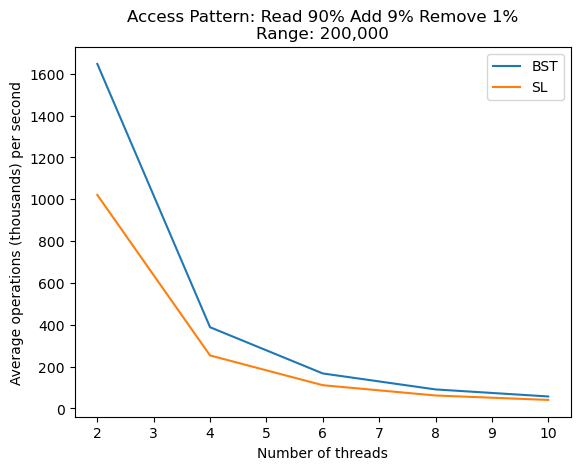

In [40]:
bst_data_90_9_1_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 9) & (gb.key_range == 200000)]
sl_data_90_9_1_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 9) & (gb.key_range == 200000)]
plot_graph(
    "Access Pattern: Read 90% Add 9% Remove 1%\nRange: 200,000",
    bst_data_90_9_1_200k.num_threads,
    bst_data_90_9_1_200k.throughput_mean,
    sl_data_90_9_1_200k.num_threads,
    sl_data_90_9_1_200k.throughput_mean
)

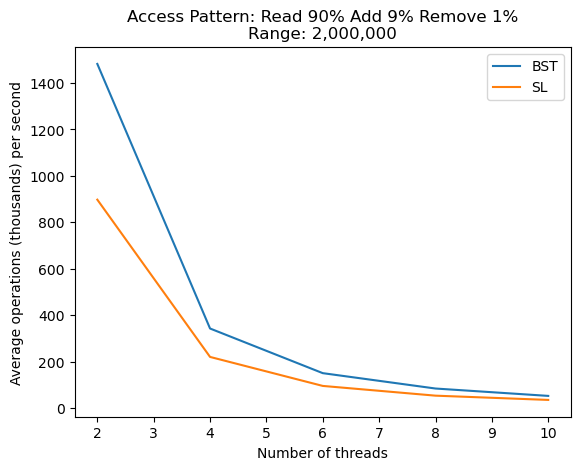

In [42]:
bst_data_90_9_1_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 9) & (gb.key_range == 2000000)]
sl_data_90_9_1_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 9) & (gb.key_range == 2000000)]
plot_graph(
    "Access Pattern: Read 90% Add 9% Remove 1%\nRange: 2,000,000",
    bst_data_90_9_1_2M.num_threads,
    bst_data_90_9_1_2M.throughput_mean,
    sl_data_90_9_1_2M.num_threads,
    sl_data_90_9_1_2M.throughput_mean
)